In [47]:
import mne
import numpy as np
import pandas as pd 
import os
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [22]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Data.csv', encoding='latin1')

df


,Questions,Subject,Medium,Max Marks,Marks Obtained,Marks Obtained Chat GPT
0,Demonstrate using logical equivalences that [(...,DS,Exam,2.0,2.0,2.0
1,Consider an application program containing int...,DS,Exam,2.0,2.0,0.5
2,Compute the most simplified form of the compou...,DS,Quiz,5.0,3.0,5.0
3,Use De Morgans law to write negation of give ...,DS,Assignment,2.0,2.0,2.0
4,Use logical equivalences to show that: (p ? q)...,DS,Assignment,5.0,4.0,3.0
...,...,...,...,...,...,...
138,Why LASER light is not like ordinary white light?,AP,Exam,2.0,1.5,2.0
139,A sled of mass 15 kg is pulled along a frictio...,AP,Assignment,4.0,3.0,3.0
140,Define Hall's effect and also derive the equat...,AP,Assignment,4.0,3.0,2.0
141,Explain the Young's double slit experiment wit...,AP,Exam,4.0,4.0,2.5


In [23]:
# Text Encoding (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
questions_tfidf = tfidf_vectorizer.fit_transform(df['Questions'])

questions_tfidf

<143x1140 sparse matrix of type '<class 'numpy.float64'>'
	with 2606 stored elements in Compressed Sparse Row format>

In [24]:


# Label Encoding for "subject" and "exam" columns
label_encoder = LabelEncoder()

# Encode the "subject" column
df['Subject'] = label_encoder.fit_transform(df['Subject'])

# Encode the "exam" column
df['Medium'] = label_encoder.fit_transform(df['Medium'])

# Text Encoding (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
questions_tfidf = tfidf_vectorizer.fit_transform(df['Questions'])

# Combine Encoded Features
combined_features = np.hstack((questions_tfidf.toarray(), df[['Subject', 'Medium']].values))

# If needed, standardize the features
scaler = StandardScaler()
combined_features = scaler.fit_transform(combined_features)


In [25]:
df

,Questions,Subject,Medium,Max Marks,Marks Obtained,Marks Obtained Chat GPT
0,Demonstrate using logical equivalences that [(...,6,1,2.0,2.0,2.0
1,Consider an application program containing int...,6,1,2.0,2.0,0.5
2,Compute the most simplified form of the compou...,6,6,5.0,3.0,5.0
3,Use De Morgans law to write negation of give ...,6,0,2.0,2.0,2.0
4,Use logical equivalences to show that: (p ? q)...,6,0,5.0,4.0,3.0
...,...,...,...,...,...,...
138,Why LASER light is not like ordinary white light?,1,1,2.0,1.5,2.0
139,A sled of mass 15 kg is pulled along a frictio...,1,0,4.0,3.0,3.0
140,Define Hall's effect and also derive the equat...,1,0,4.0,3.0,2.0
141,Explain the Young's double slit experiment wit...,1,1,4.0,4.0,2.5


In [26]:
# Text Encoding (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
questions_tfidf = tfidf_vectorizer.fit_transform(df['Questions'])

# Create a new DataFrame for the encoded questions
encoded_questions_df = pd.DataFrame(questions_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the encoded questions DataFrame with the original DataFrame
df = pd.concat([df, encoded_questions_df], axis=1)


In [29]:
df = df.drop("Questions", axis=1)
df

,Subject,Medium,Max Marks,Marks Obtained,Marks Obtained Chat GPT,10,100,1000,11,125,...,worth,would,write,xor,years,yes,you,young,your,µsec
0,6,1,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,6,1,2.0,2.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,6,6,5.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,6,0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.182079,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,6,0,5.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,1,2.0,1.5,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
139,1,0,4.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
140,1,0,4.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
141,1,1,4.0,4.0,2.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.381996,0.0,0.0


In [30]:
#missing values
df.isnull().sum()*100/len(df)

Subject                    0.0
Medium                     0.0
Max Marks                  0.0
Marks Obtained             0.0
Marks Obtained Chat GPT    0.0
                          ... 
yes                        0.0
you                        0.0
young                      0.0
your                       0.0
µsec                       0.0
Length: 1144, dtype: float64

In [31]:
pca = PCA()
pca.fit(df) 
pca.explained_variance_ratio_

array([5.37536019e-01, 2.67956454e-01, 1.41991425e-01, 1.34277609e-02,
       5.64466686e-03, 1.33973403e-03, 7.03366332e-04, 6.29110079e-04,
       5.93751395e-04, 5.48521814e-04, 5.31835735e-04, 5.05236810e-04,
       4.85467484e-04, 4.67416096e-04, 4.60388808e-04, 4.52232795e-04,
       4.41583934e-04, 4.35161316e-04, 4.13361206e-04, 4.08104598e-04,
       4.00269063e-04, 3.96458326e-04, 3.86889414e-04, 3.70224019e-04,
       3.69387730e-04, 3.64321217e-04, 3.58902293e-04, 3.56259371e-04,
       3.47898334e-04, 3.46697584e-04, 3.34578527e-04, 3.33217804e-04,
       3.29210077e-04, 3.21846336e-04, 3.18342208e-04, 3.10812842e-04,
       3.09353737e-04, 3.05429844e-04, 3.03864373e-04, 2.99166573e-04,
       2.96802743e-04, 2.91950602e-04, 2.88008377e-04, 2.84633423e-04,
       2.82621807e-04, 2.78568859e-04, 2.75094637e-04, 2.73094582e-04,
       2.67579535e-04, 2.66099972e-04, 2.64499233e-04, 2.62095675e-04,
       2.59467584e-04, 2.57567866e-04, 2.55270928e-04, 2.54057459e-04,
      

In [33]:
pca = PCA(n_components = 3)
pca.fit(df)
pca.components_

array([[-4.52901579e-01, -2.59172968e-01,  5.17705246e-01, ...,
         3.62333812e-04, -7.07552532e-04,  5.63462356e-04],
       [ 8.62714193e-01,  1.10526311e-01,  2.98150337e-01, ...,
        -1.41602210e-03, -1.39387120e-03, -6.62014597e-04],
       [ 2.21417965e-01, -9.58250975e-01, -8.79664030e-02, ...,
         2.29162141e-04,  9.98712321e-04,  1.25985101e-04]])

In [35]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns,
              index = ['Component 1', 'Component 2','Component 3'])
df_pca_comp

,Subject,Medium,Max Marks,Marks Obtained,Marks Obtained Chat GPT,10,100,1000,11,125,...,worth,would,write,xor,years,yes,you,young,your,µsec
Component 1,-0.452902,-0.259173,0.517705,0.444159,0.511594,-0.000589,0.000388,0.000231,0.000089,0.000563,...,0.000121,0.000491,0.001291,-0.000353,-0.000090,0.000645,0.000985,0.000362,-0.000708,0.000563
Component 2,0.862714,0.110526,0.298150,0.245740,0.304364,0.001314,-0.002449,-0.000588,0.000637,-0.000662,...,-0.000825,-0.000577,-0.000296,-0.000837,0.000214,-0.000657,-0.002919,-0.001416,-0.001394,-0.000662
Component 3,0.221418,-0.958251,-0.087966,-0.106031,-0.108438,0.002033,0.000542,0.000230,-0.000995,0.000126,...,-0.000213,0.000110,-0.001231,-0.001938,0.000431,0.000095,-0.001035,0.000229,0.000999,0.000126


In [36]:
pca.transform(df)
scores_pca = pca.transform(df)
scores_pca

array([[-2.45568769, -0.79453046,  1.88686958],
       [-3.22351388, -1.25387503,  2.04853166],
       [-0.22131478,  1.81109567, -3.60733326],
       [-2.19780412, -0.90811467,  2.84654174],
       [ 0.75731122,  0.78628041,  2.26207425],
       [ 2.22459227,  1.64070903,  1.93789794],
       [ 4.91759661,  3.45626963,  0.37109482],
       [-2.2787589 ,  0.60498399, -3.21484181],
       [-2.45940856, -0.7987124 ,  1.88185276],
       [-2.72402319,  0.35858215, -3.10948017],
       [-2.28193504,  0.60350831, -3.21383372],
       [-6.58675464,  1.49624152, -1.94105275],
       [-6.02692128,  0.51908596,  3.00413416],
       [-6.02750238,  0.52064029,  3.00449812],
       [-1.35053423, -3.80306187,  2.29036397],
       [ 0.37625249, -2.53980721,  0.91761843],
       [ 1.85133771, -1.69104391,  0.61473964],
       [-1.35167852, -3.80600101,  2.29282136],
       [-0.84027506, -3.50172219,  2.18420281],
       [ 4.03711252, -1.8163607 ,  1.05126089],
       [ 3.59198185, -2.06085931,  1.154

In [39]:
wcss = []
for i in range(1,11):
    print(i)
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

1


C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

2
3
4
5
6
7
8
9


C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

10


C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


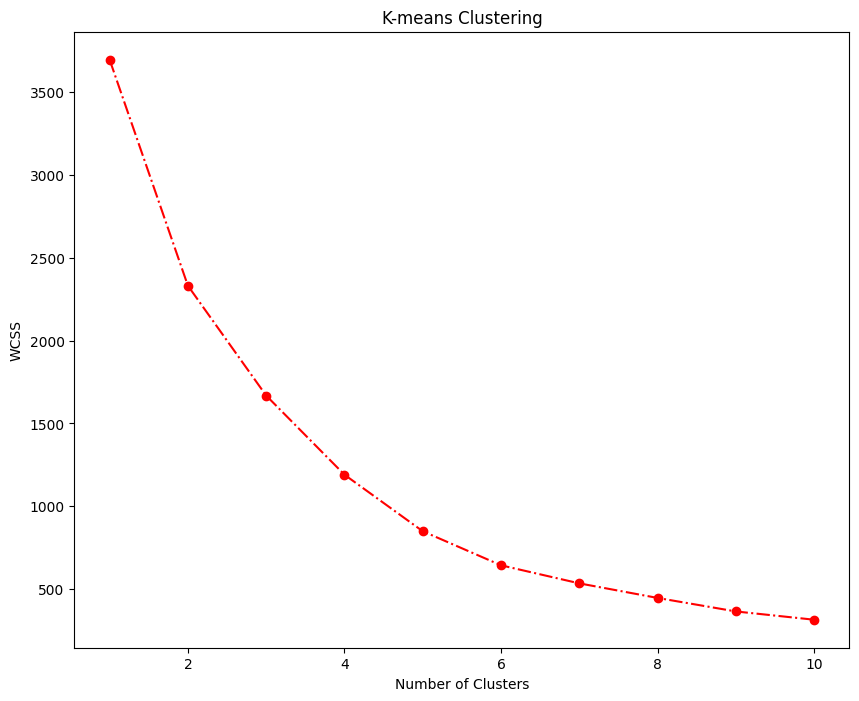

In [40]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [42]:
# Initialize and fit K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit_predict(scores_pca)
df_kmeans= df.copy()
df_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2','Component 3']
df_kmeans['Segment K-means'] = kmeans.labels_
df_kmeans

C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Subject,Medium,Max Marks,Marks Obtained,Marks Obtained Chat GPT,10,100,1000,11,125,...,years,yes,you,young,your,µsec,Component 1,Component 2,Component 3,Segment K-means
0,6,1,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,-2.455688,-0.794530,1.886870,1
1,6,1,2.0,2.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,-3.223514,-1.253875,2.048532,1
2,6,6,5.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,-0.221315,1.811096,-3.607333,1
3,6,0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,-2.197804,-0.908115,2.846542,1
4,6,0,5.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.757311,0.786280,2.262074,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,1,2.0,1.5,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,-0.412679,-5.239305,0.831826,0
139,1,0,4.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,2.060554,-4.076414,1.346299,0
140,1,0,4.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.546934,-4.382042,1.454411,0
141,1,1,4.0,4.0,2.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.381996,0.0,0.0,1.987928,-3.872740,0.332115,0


In [43]:
df_segm_analysis = df_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Subject,Medium,Max Marks,Marks Obtained,Marks Obtained Chat GPT,10,100,1000,11,125,...,xor,years,yes,you,young,your,µsec,Component 1,Component 2,Component 3
Segment K-means,,,,,,,,,,,,,,,,,,,,,
0,3.461538,1.487179,5.179487,4.403846,4.910256,0.004894,0.007214,0.001792,0.00259,0.004542,...,0.000000,0.000000,0.004846,0.011432,0.004897,0.007269,0.004542,2.773110,-0.506004,0.004437
1,7.184615,3.200000,2.338462,2.015385,2.107692,0.011970,0.005009,0.000000,0.00000,0.000000,...,0.004641,0.001053,0.000000,0.003068,0.000000,0.022087,0.000000,-3.327732,0.607205,-0.005324


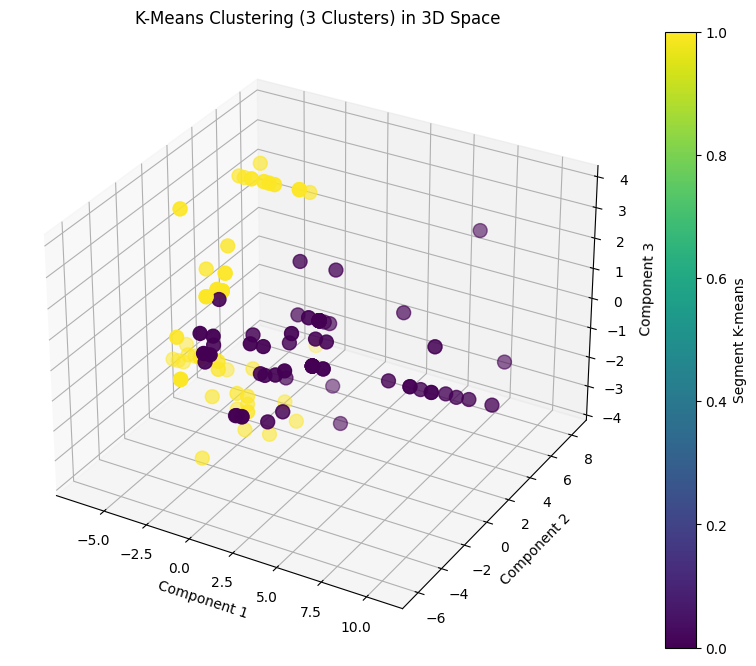

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import 3D projection support

# Create a 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = df_kmeans['Component 1']
y = df_kmeans['Component 2']
z = df_kmeans['Component 3']
c = df_kmeans['Segment K-means']

scatter = ax.scatter(x, y, z, c=c, cmap='viridis', s=100, marker='o')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('K-Means Clustering (3 Clusters) in 3D Space')

# Create a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Segment K-means')

plt.show()


In [48]:
sil=[]
dbin=[]
labels = kmeans.labels_  # Cluster labels
silhouette_avg = silhouette_score(scores_pca, labels)
db_index = davies_bouldin_score(scores_pca, labels)
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", db_index)
sil.append(silhouette_avg)
dbin.append(db_index)

Silhouette Score: 0.3413415343436084
Davies-Bouldin Index: 1.1981298715218147
